# <u>**Neural Networks & Deep Learning - Final assesment**</u>

## **Authors**: Victor Sanchez, Elena Gil & Juan Martínez
## **Professor**: Juan Maroñas
## **CUNEF Universidad** - May 2025

Abstract: Looking for internships as a final-year student can be stressful and full of uncertainty, we've all been there. To make this process a little easier, we've built a neural network that helps predict whether a student is likely to get placed in an internship. By analyzing key factors from student profiles and past applicants, our model aims to give a clearer picture of placement chances. Our goal is to create a supportive tool that brings some clarity to an otherwise confusing time.

#**1. Libraries Implemented**

In [298]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Dataset Loading & Overlook**

In [299]:
df = pd.read_csv("https://drive.google.com/uc?id=1RRDsQs62BPzFlvXzm_LMustoagFIpuAx")

- Variable 1: StudentID - Indexed ID for a certain student
- Variable 2: CGPA - Bachelor's Grade Point Average for certain students
- Variable 3: Internships - Number of past internships of a certain student
- Variable 4: Workshops/Certifications - Number of certifications of a certain student
- Variable 5: AptitudeTestScore - Score obtained in the Aptitude Test
- Variable 6: SoftSkillRating - Shows the rating obtained in the soft skills test
- Variable 7: ExtracurricularActivities - Specifies wheter or not the student takes part in any extracurricular activities
- Variable 8: PlacementTraining - Specifies wheter or not the student went through the placement training
- Variable 9: SSC_Marks - Description
- Variable 10: HSC_Marks - High School grades of a certain student
- Variable 11: Projects - Number of projects of a certain student
------------------------------------------------------
- Variable 12: PlacementStatus - Class to predict: Whether or not he placed


In [300]:
df.head(5)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


# **3. Preprocessing**

* ### **3.1)** Dataset Length

In [301]:
len(df)

10000

* ### **3.2)** Numerical Variables

* * ### **3.2.1)** Let's get rid of the StudentID variable

In [302]:
df.drop(columns=['StudentID'], inplace= True)
df.head(5)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [303]:
numerical_inic = (df.select_dtypes(include=['int','float']))
print(numerical_inic.columns)

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks'],
      dtype='object')


* ### **3.3)** Categorical Variables

In [304]:
categorical_inic = (df.select_dtypes(include=['object']))
print(categorical_inic.columns)

Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')


* * ### **3.3.1)** Let's dig down into some of our variables

* * *  ### *Should this 3 numerical varibales be typecasted into categorical variables?*

* * * * ### **No**: Explanation

In [305]:
typecast = ['Internships','Projects','Workshops/Certifications']

for type in typecast:
  print(df[type].value_counts())
  print("\n")

Internships
1    5542
2    2475
0    1983
Name: count, dtype: int64


Projects
3    3873
1    3547
2    2550
0      30
Name: count, dtype: int64


Workshops/Certifications
0    3739
2    3303
1    2674
3     284
Name: count, dtype: int64




* ### **3.4)** Data Distribution

* * ### **3.4.1)** Are there any null values in our data?

In [306]:
df.isna().sum()

,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0
HSC_Marks,0


* * ### **3.4.2)** Numerical variables overview

In [307]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


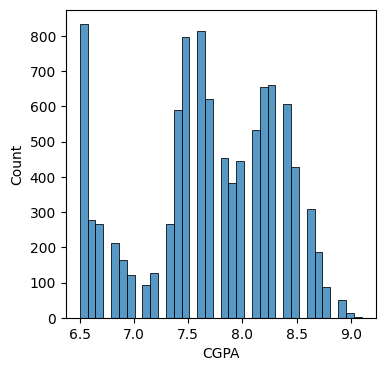

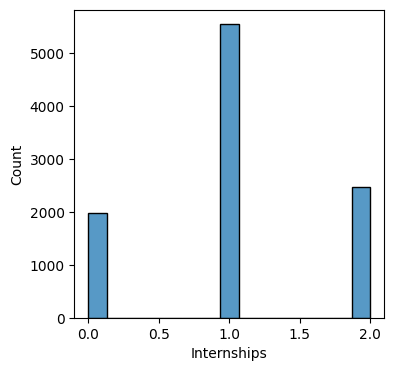

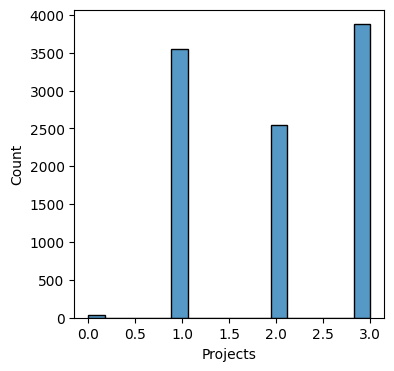

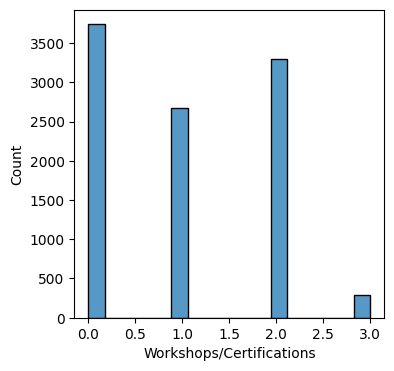

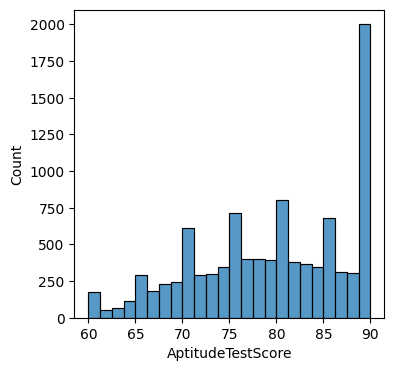

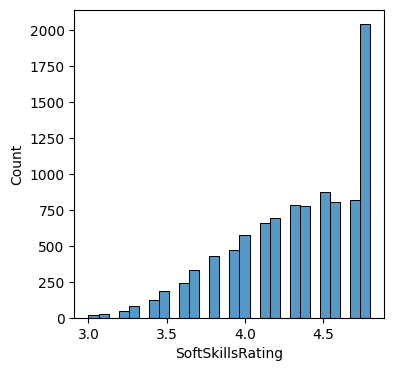

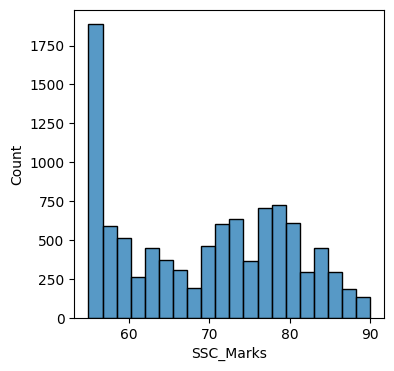

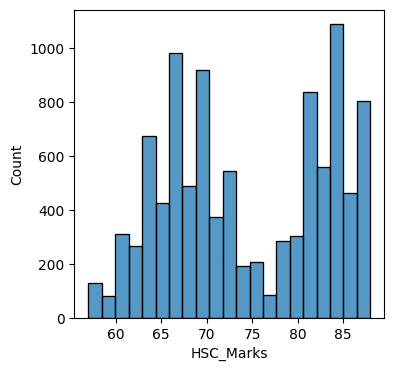

In [308]:
for column in numerical_inic.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(df[column])
    plt.show()
    print("\n \n")

* * * ### **3.4.2.1)** Are there any outliers?

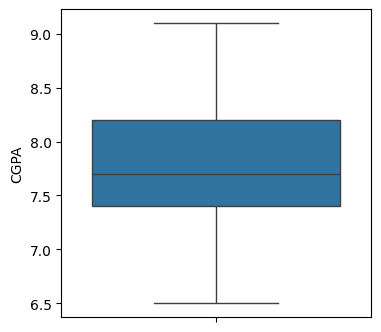

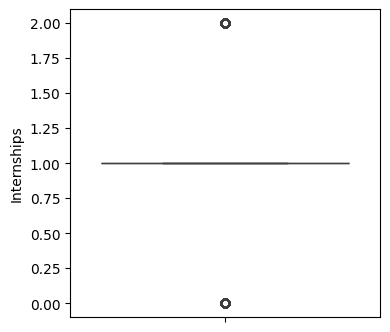

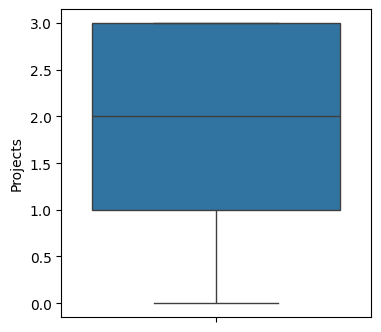

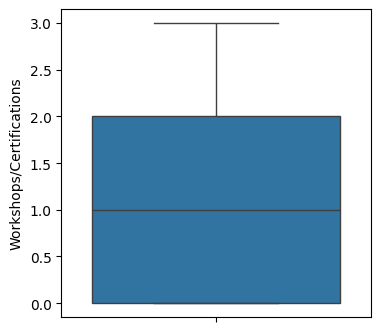

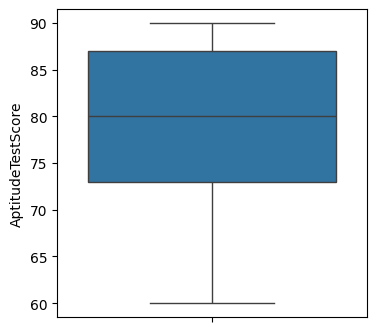

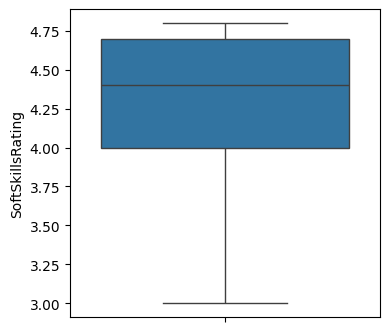

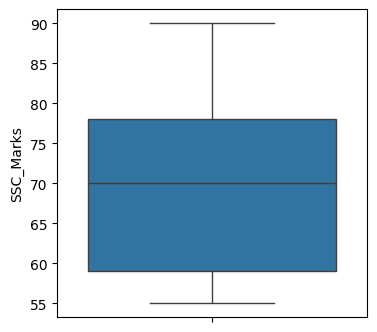

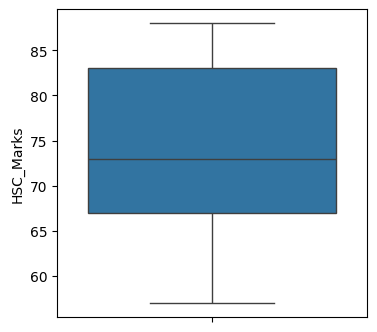

In [309]:
for column in numerical_inic.columns:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[column])
  plt.show()
  print("\n \n")

* * ### **3.4.3)** Categorical variables overview



In [310]:
for type in df.select_dtypes(object):
  print(df[type].value_counts())
  print("\n")

ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64


PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64


PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64




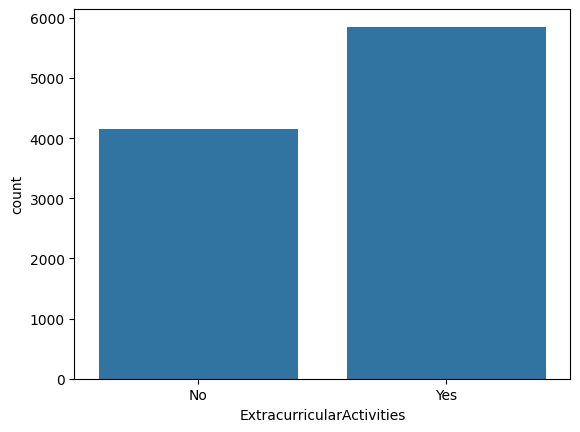

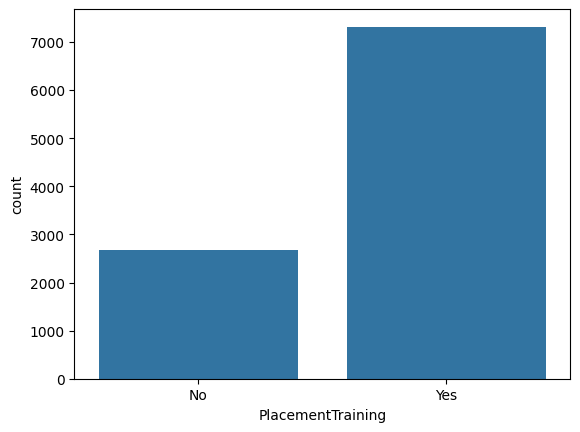

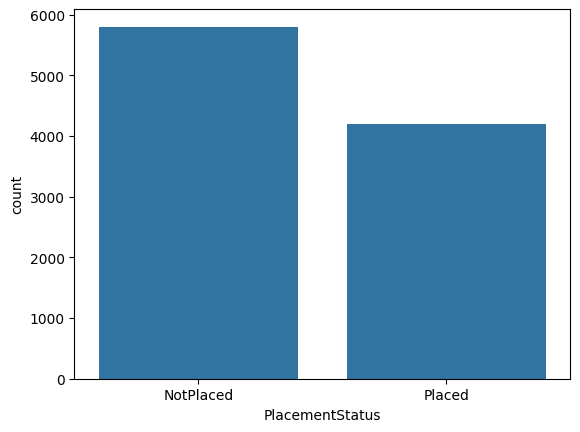

In [311]:
for cat in categorical_inic.columns:
    sns.countplot(x=cat, data=df)
    plt.show()

* * ### **3.4.4)** Desagregar our categorical variables


In [312]:
for column in categorical_inic.columns:
    print(column,":",df[column].nunique(),"valores distintos \n")

ExtracurricularActivities : 2 valores distintos 

PlacementTraining : 2 valores distintos 

PlacementStatus : 2 valores distintos 



In [313]:
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

print(df.value_counts())

CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus
8.3   2            3         2                         90                 4.8               1                          1                  81         87         1                  3
8.5   2            3         2                         90                 4.8               1                          1                  77         88         1                  3
8.2   2            3         2                         90                 4.8               1                          1                  85         83         1                  3
8.7   2            3         2                         90                 4.8               1                          1                  79         85         1                  3
8.5   2            3         2                         90                 4.8               1       

* * ### **3.4.4)** Correlation Analysis


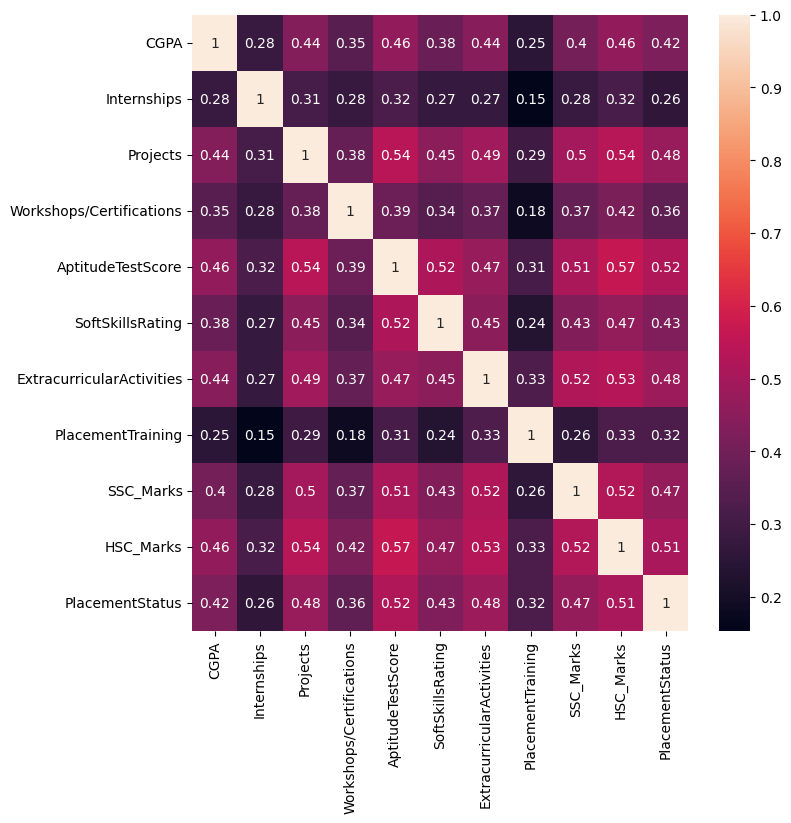

In [314]:
matriz_corr = df[df.columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(matriz_corr, annot=True)
plt.show()

* * * ### Should we drop any of our variables?
* * * * ### **Yes / No** Explanation for or against

In [315]:
df2 = df.copy()

df2.drop(columns=['Internships'], inplace=True)
df2.drop(columns=['PlacementTraining'], inplace=True)

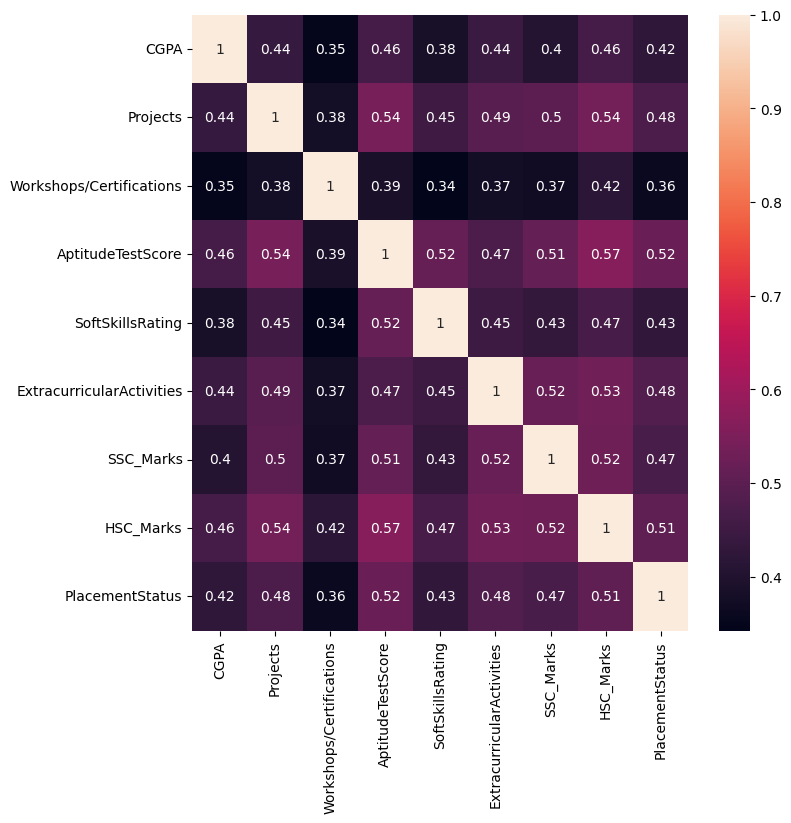

In [316]:
matriz_corr = df2[df2.columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(matriz_corr, annot=True)
plt.show()

# **4. Fully Connected Neural Network**

In [317]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

* ### **4.1)** Classes

In [318]:
def linear_link(x):
    return x

In [319]:
class FCLayer(nn.Module):
    def __init__(self, dim_in, dim_out, act, drop, batch_norm, add_residual):
        super().__init__()
        self.linear = nn.Linear(dim_in, dim_out)
        self.act = act
        self.drop = nn.Dropout(p=drop)
        self.bn = nn.BatchNorm1d(dim_out) if batch_norm else nn.Identity()
        self.add_residual = add_residual
        self.bottleneck = nn.Linear(dim_in, dim_out) if (add_residual and dim_in != dim_out) else nn.Identity()
        self.traced_grads = {}

    def forward(self, x):
        fx = self.linear(x)
        fx = self.bn(fx)
        fx = self.act(fx)
        fx = self.drop(fx)
        if self.add_residual:
            fx = self.bottleneck(x) + fx
        return fx

    def trace_gradients(self):
        for k, v in self.named_parameters():
            if v.grad is not None:
                self.traced_grads.setdefault(k, []).append(v.grad.data.clone())

    def reset_traced_grads(self):
        self.traced_grads = {}

    def get_traced_grads(self):
        return self.traced_grads

In [320]:
class FCDNN(nn.Module):
    def __init__(self, dim_in, dim_out, neurons_hidden, hidden_activations,
                 dropout_hidden, batch_norm, add_residual, link_function, loss_function):
        super().__init__()
        assert len(neurons_hidden) == len(hidden_activations)
        assert len(neurons_hidden) == len(dropout_hidden)
        layers = []
        for nh, act, do in zip(neurons_hidden, hidden_activations, dropout_hidden):
            layers.append(FCLayer(dim_in, nh, act, do, batch_norm, add_residual))
            dim_in = nh
        layers.append(FCLayer(dim_in, dim_out, linear_link, 0.0, False, False))
        self.layers = nn.ModuleList(layers)
        self.link = link_function
        self.loss = loss_function

    def forward_train(self, x, apply_link):
        self.train()
        for l in self.layers:
            x = l(x)
        return self.link(x) if apply_link else x

    def forward_eval(self, x, apply_link):
        self.eval()
        for l in self.layers:
            x = l(x)
        return self.link(x) if apply_link else x

    def compute_loss(self, t, y):
        if t.ndim == 1:
            t = t.view(-1, 1)
        return self.loss(y, t)


In [321]:
def compute_metric(dataloader, model):
    model.eval()
    correct = 0
    total = 0
    device = next(model.parameters()).device
    with torch.no_grad():
        for x, t in dataloader:
            x = x.to(device)
            t = t.to(device).view(-1, 1)
            y = model.forward_eval(x, apply_link=True)
            y_pred = (y > 0.5).float()
            correct += (y_pred == t).sum().item()
            total += t.size(0)
    return correct / total



In [322]:
def test_model(model,
               epochs,
               train_batch_size,
               lr,
               mmu,
               apply_scheduler,
               eval_each,
               train_dataset,
               test_dataset):

    train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
    train_loader_eval = DataLoader(train_dataset, batch_size=1000, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    N_training = len(train_dataset)

    loss_epochs, train_acc_epochs, test_acc_epochs = [], [], []

    with torch.no_grad():
        loss_acc = 0.0
        for x, t in train_loader_eval:
            x = x.to(next(model.parameters()).device)
            t = t.to(next(model.parameters()).device)
            y = model.forward_train(x, apply_link=True)
            loss_acc += len(x) * model.compute_loss(t, y).item()
        train_acc = compute_metric(train_loader_eval, model)
        test_acc = compute_metric(test_loader, model)
    loss_epochs.append(loss_acc / N_training)
    train_acc_epochs.append(train_acc)
    test_acc_epochs.append(test_acc)

    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mmu)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[20,80], gamma=0.1)

    for e in range(epochs):
        loss_acc = 0.0
        for x, t in train_loader:
            x = x.to(next(model.parameters()).device)
            t = t.to(next(model.parameters()).device)
            y = model.forward_train(x, apply_link=True)
            L = model.compute_loss(t, y)
            loss_acc += len(x) * L.item()
            optimizer.zero_grad()
            L.backward()
            optimizer.step()
        if apply_scheduler:
            scheduler.step()
        # Evaluate
        if (e + 1) % eval_each == 0 or e == 0:
            train_acc = compute_metric(train_loader_eval, model)
            test_acc = compute_metric(test_loader, model)
        loss_epochs.append(loss_acc / N_training)
        train_acc_epochs.append(train_acc)
        test_acc_epochs.append(test_acc)
        print(f"Epoch {e+1}/{epochs} - Loss: {loss_epochs[-1]:.4f} - Train Acc: {train_acc:.4f} - Test Acc: {test_acc:.4f}")
    return loss_epochs, train_acc_epochs, test_acc_epochs


* ### **4.2)** Model Building

In [323]:
Y = df['PlacementStatus']
X = df.drop(columns=['PlacementStatus'])

In [324]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [325]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(Y, dtype=torch.float32)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42)

In [327]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [328]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42)

In [329]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

* * ### **4.2.1)** 2 Hidden Layers FDCNN

In [330]:
%%capture
input_dim = X_tensor.shape[1]
model_2 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.2, 0.2],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_2.to('cpu')

In [331]:
loss2, train_acc2, test_acc2 = test_model(
    model_2, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4851 - Train Acc: 0.8006 - Test Acc: 0.7925
Epoch 2/8 - Loss: 0.4497 - Train Acc: 0.8013 - Test Acc: 0.7930
Epoch 3/8 - Loss: 0.4454 - Train Acc: 0.8024 - Test Acc: 0.7925
Epoch 4/8 - Loss: 0.4420 - Train Acc: 0.8054 - Test Acc: 0.7915
Epoch 5/8 - Loss: 0.4427 - Train Acc: 0.8045 - Test Acc: 0.7925
Epoch 6/8 - Loss: 0.4394 - Train Acc: 0.8054 - Test Acc: 0.7905
Epoch 7/8 - Loss: 0.4391 - Train Acc: 0.8064 - Test Acc: 0.7900
Epoch 8/8 - Loss: 0.4385 - Train Acc: 0.8055 - Test Acc: 0.7960


In [332]:
%%capture
input_dim = X_tensor.shape[1]
model_2 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[64, 32],
    hidden_activations=[nn.Tanh(), nn.Tanh()],
    dropout_hidden=[0.2, 0.2],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_2.to('cpu')

In [333]:
loss21, train_acc2, test_acc21 = test_model(
    model_2, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4552 - Train Acc: 0.7999 - Test Acc: 0.7945
Epoch 2/8 - Loss: 0.4430 - Train Acc: 0.8005 - Test Acc: 0.7940
Epoch 3/8 - Loss: 0.4407 - Train Acc: 0.8019 - Test Acc: 0.7920
Epoch 4/8 - Loss: 0.4395 - Train Acc: 0.8019 - Test Acc: 0.7945
Epoch 5/8 - Loss: 0.4377 - Train Acc: 0.8025 - Test Acc: 0.7905
Epoch 6/8 - Loss: 0.4377 - Train Acc: 0.8024 - Test Acc: 0.7950
Epoch 7/8 - Loss: 0.4389 - Train Acc: 0.8030 - Test Acc: 0.7910
Epoch 8/8 - Loss: 0.4388 - Train Acc: 0.8023 - Test Acc: 0.7915


* * ### **4.2.2)** 3 Hidden Layers FDCNN

In [334]:
%%capture
model_3 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_3.to('cpu')

In [335]:
loss3, train_acc3, test_acc3 = test_model(
    model_3, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4899 - Train Acc: 0.8023 - Test Acc: 0.7940
Epoch 2/8 - Loss: 0.4352 - Train Acc: 0.8019 - Test Acc: 0.7940
Epoch 3/8 - Loss: 0.4321 - Train Acc: 0.8031 - Test Acc: 0.7945
Epoch 4/8 - Loss: 0.4304 - Train Acc: 0.8037 - Test Acc: 0.7930
Epoch 5/8 - Loss: 0.4294 - Train Acc: 0.8059 - Test Acc: 0.7945
Epoch 6/8 - Loss: 0.4271 - Train Acc: 0.8085 - Test Acc: 0.7935
Epoch 7/8 - Loss: 0.4280 - Train Acc: 0.8029 - Test Acc: 0.7920
Epoch 8/8 - Loss: 0.4243 - Train Acc: 0.8033 - Test Acc: 0.7910


In [336]:
%%capture
model_3 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[128, 64, 32],
    hidden_activations=[nn.Tanh(), nn.Tanh(), nn.Tanh()],
    dropout_hidden=[0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_3.to('cpu')

In [337]:
loss31, train_acc3, test_acc31 = test_model(
    model_3, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4577 - Train Acc: 0.8005 - Test Acc: 0.7925
Epoch 2/8 - Loss: 0.4380 - Train Acc: 0.8011 - Test Acc: 0.7930
Epoch 3/8 - Loss: 0.4375 - Train Acc: 0.8015 - Test Acc: 0.7925
Epoch 4/8 - Loss: 0.4346 - Train Acc: 0.8009 - Test Acc: 0.7970
Epoch 5/8 - Loss: 0.4358 - Train Acc: 0.8013 - Test Acc: 0.7965
Epoch 6/8 - Loss: 0.4341 - Train Acc: 0.8034 - Test Acc: 0.7880
Epoch 7/8 - Loss: 0.4327 - Train Acc: 0.8030 - Test Acc: 0.7920
Epoch 8/8 - Loss: 0.4324 - Train Acc: 0.8007 - Test Acc: 0.7860


* * ### **4.2.3)** 4 Hidden Layers FDCNN

In [338]:
%%capture
model_4 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_4.to('cpu')

In [339]:
loss4, train_acc4, test_acc4 = test_model(
    model_4, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.5279 - Train Acc: 0.8021 - Test Acc: 0.7900
Epoch 2/8 - Loss: 0.4361 - Train Acc: 0.8056 - Test Acc: 0.7915
Epoch 3/8 - Loss: 0.4324 - Train Acc: 0.8014 - Test Acc: 0.7965
Epoch 4/8 - Loss: 0.4308 - Train Acc: 0.8014 - Test Acc: 0.7970
Epoch 5/8 - Loss: 0.4302 - Train Acc: 0.8036 - Test Acc: 0.7910
Epoch 6/8 - Loss: 0.4294 - Train Acc: 0.8090 - Test Acc: 0.7930
Epoch 7/8 - Loss: 0.4262 - Train Acc: 0.8079 - Test Acc: 0.7915
Epoch 8/8 - Loss: 0.4277 - Train Acc: 0.8097 - Test Acc: 0.7930


In [340]:
%%capture
model_4 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[256,128, 64, 32],
    hidden_activations=[nn.Tanh(), nn.Tanh(), nn.Tanh(), nn.Tanh()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_4.to('cpu')

In [341]:
loss41, train_acc4, test_acc41 = test_model(
    model_4, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4623 - Train Acc: 0.8000 - Test Acc: 0.7935
Epoch 2/8 - Loss: 0.4393 - Train Acc: 0.8014 - Test Acc: 0.7905
Epoch 3/8 - Loss: 0.4380 - Train Acc: 0.7999 - Test Acc: 0.7825
Epoch 4/8 - Loss: 0.4364 - Train Acc: 0.8020 - Test Acc: 0.7915
Epoch 5/8 - Loss: 0.4339 - Train Acc: 0.7991 - Test Acc: 0.7950
Epoch 6/8 - Loss: 0.4343 - Train Acc: 0.8039 - Test Acc: 0.7905
Epoch 7/8 - Loss: 0.4332 - Train Acc: 0.8035 - Test Acc: 0.7895
Epoch 8/8 - Loss: 0.4328 - Train Acc: 0.8034 - Test Acc: 0.7940


* * ### **4.2.4)** 5 Hidden Layers FDCNN

In [342]:
%%capture
model_5 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[512,256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_5.to('cpu')

In [343]:
loss5, train_acc5, test_acc5 = test_model(
    model_5, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.5285 - Train Acc: 0.7985 - Test Acc: 0.7990
Epoch 2/8 - Loss: 0.4403 - Train Acc: 0.8031 - Test Acc: 0.7960
Epoch 3/8 - Loss: 0.4347 - Train Acc: 0.8047 - Test Acc: 0.7850
Epoch 4/8 - Loss: 0.4311 - Train Acc: 0.8059 - Test Acc: 0.7960
Epoch 5/8 - Loss: 0.4286 - Train Acc: 0.8064 - Test Acc: 0.7895
Epoch 6/8 - Loss: 0.4275 - Train Acc: 0.8103 - Test Acc: 0.7955
Epoch 7/8 - Loss: 0.4273 - Train Acc: 0.8086 - Test Acc: 0.7905
Epoch 8/8 - Loss: 0.4236 - Train Acc: 0.8125 - Test Acc: 0.7905


In [344]:
%%capture
model_5 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[512,256,128, 64, 32],
    hidden_activations=[nn.Tanh(), nn.Tanh(), nn.Tanh(), nn.Tanh(), nn.Tanh()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_5.to('cpu')

In [345]:
loss51, train_acc5, test_acc51 = test_model(
    model_5, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=False, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4675 - Train Acc: 0.8011 - Test Acc: 0.7900
Epoch 2/8 - Loss: 0.4393 - Train Acc: 0.7973 - Test Acc: 0.7955
Epoch 3/8 - Loss: 0.4389 - Train Acc: 0.7985 - Test Acc: 0.7925
Epoch 4/8 - Loss: 0.4363 - Train Acc: 0.7953 - Test Acc: 0.8010
Epoch 5/8 - Loss: 0.4372 - Train Acc: 0.8004 - Test Acc: 0.7945
Epoch 6/8 - Loss: 0.4360 - Train Acc: 0.8030 - Test Acc: 0.7830
Epoch 7/8 - Loss: 0.4351 - Train Acc: 0.8040 - Test Acc: 0.7890
Epoch 8/8 - Loss: 0.4333 - Train Acc: 0.8031 - Test Acc: 0.7835


* ### **4.3)** nn.ReLU( ) - nn.Tanh( )

In [346]:
losses = [[loss2, loss21],[loss3, loss31],[loss4, loss41], [loss5, loss51]]
tests = [[test_acc2, test_acc21], [test_acc3, test_acc31], [test_acc4, test_acc41], [test_acc5, test_acc51]]
model_names = ['FCDNN 2 capas', 'FCDNN 3 capas', 'FCDNN 4 capas', 'FCDNN 5 capas']

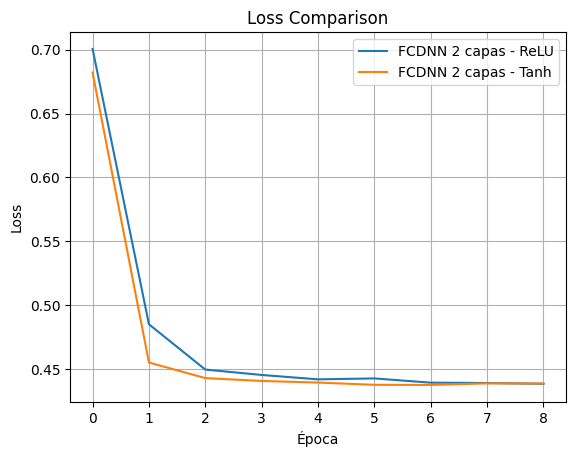

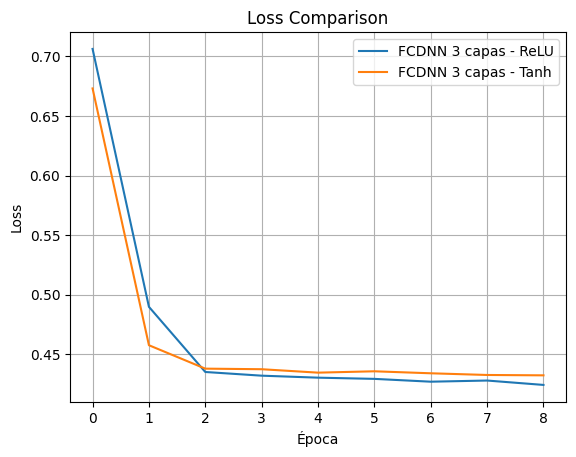

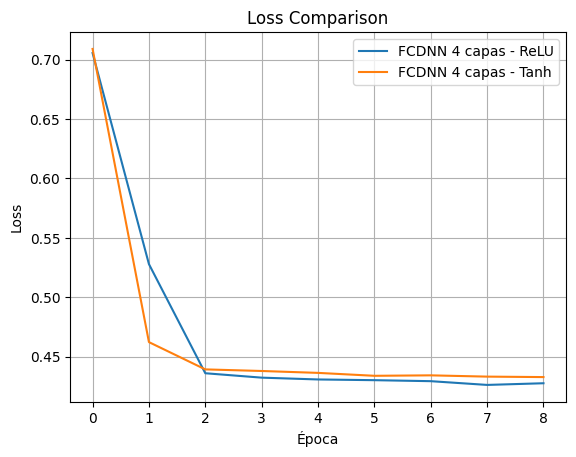

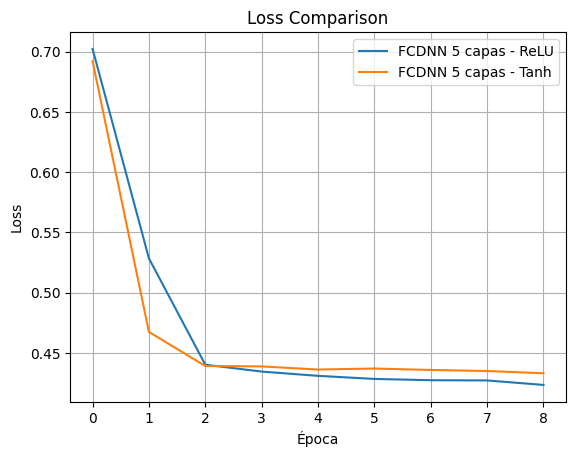

In [347]:
for i,loss in enumerate(losses):
  plt.plot(loss[0], label= f'{model_names[i]} - ReLU' )
  plt.plot(loss[1], label= f'{model_names[i]} - Tanh')
  plt.xlabel("Época")
  plt.ylabel("Loss")
  plt.title("Loss Comparison")
  plt.legend()
  plt.grid(True)
  plt.show()


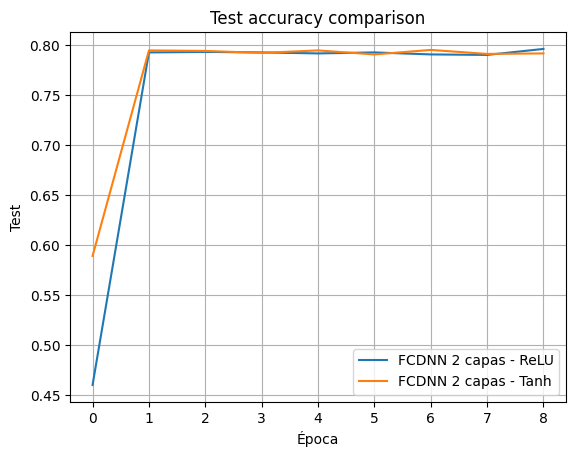

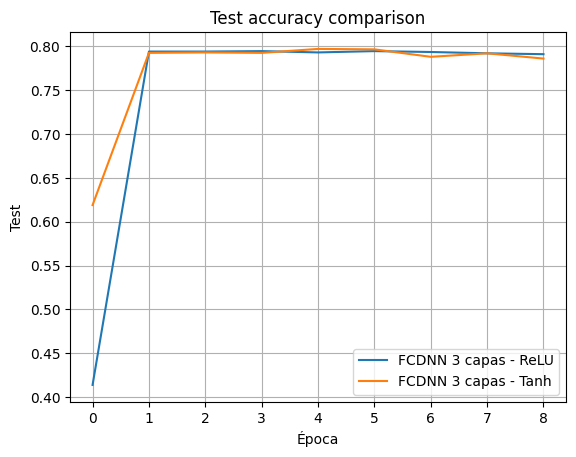

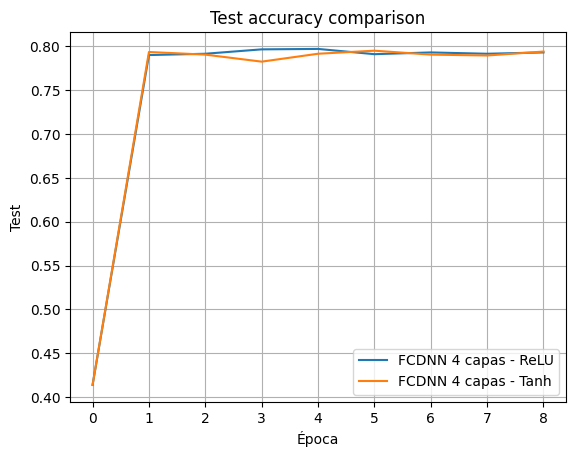

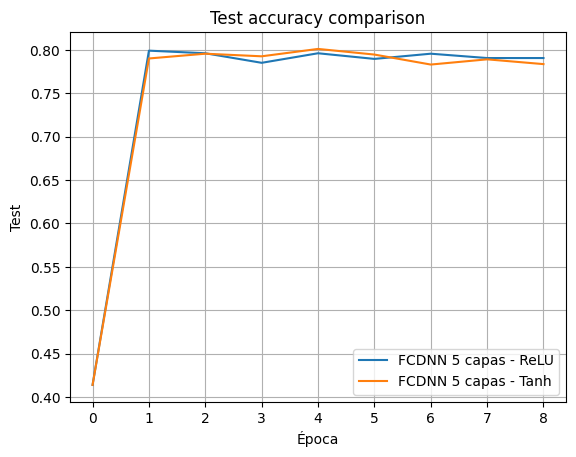

In [348]:
for i,test in enumerate(tests):
  plt.plot(test[0], label= f'{model_names[i]} - ReLU' )
  plt.plot(test[1], label= f'{model_names[i]} - Tanh')
  plt.xlabel("Época")
  plt.ylabel("Test")
  plt.title("Test accuracy comparison")
  plt.legend()
  plt.grid(True)
  plt.show()


# **6. Model Selection**

### **6.1)** Model Selected

* ### **6.2)** Model Tuning

* ### **6.2.1)** Adding Learning Rate Scheduler

In [349]:
%%capture
model_f_2 = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_4.to('cpu')

In [350]:
lossF, train_accF, test_accF = test_model(
    model_f_2, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=True, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.5058 - Train Acc: 0.8014 - Test Acc: 0.7945
Epoch 2/8 - Loss: 0.4358 - Train Acc: 0.8021 - Test Acc: 0.7885
Epoch 3/8 - Loss: 0.4318 - Train Acc: 0.8031 - Test Acc: 0.7925
Epoch 4/8 - Loss: 0.4316 - Train Acc: 0.8065 - Test Acc: 0.7905
Epoch 5/8 - Loss: 0.4289 - Train Acc: 0.8046 - Test Acc: 0.7965
Epoch 6/8 - Loss: 0.4288 - Train Acc: 0.8035 - Test Acc: 0.7965
Epoch 7/8 - Loss: 0.4268 - Train Acc: 0.8084 - Test Acc: 0.7940
Epoch 8/8 - Loss: 0.4253 - Train Acc: 0.8084 - Test Acc: 0.7840


Learning rate scheduling allows us to stabilize the "bouncing" effect in the test acurracy score.

* ### **6.2.2)** Dropout

In [351]:
%%capture
model_f_drop = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[256, 128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.2, 0.2, 0.2, 0.2],
    batch_norm= False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_f_drop.to('cpu')

In [352]:
loss5, train_acc5, test_acc5 = test_model(
    model_f_drop, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=True, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.5405 - Train Acc: 0.8017 - Test Acc: 0.7920
Epoch 2/8 - Loss: 0.4501 - Train Acc: 0.8023 - Test Acc: 0.7935
Epoch 3/8 - Loss: 0.4465 - Train Acc: 0.8051 - Test Acc: 0.7920
Epoch 4/8 - Loss: 0.4425 - Train Acc: 0.8064 - Test Acc: 0.7935
Epoch 5/8 - Loss: 0.4396 - Train Acc: 0.8060 - Test Acc: 0.7925
Epoch 6/8 - Loss: 0.4410 - Train Acc: 0.8106 - Test Acc: 0.7920
Epoch 7/8 - Loss: 0.4353 - Train Acc: 0.8090 - Test Acc: 0.7925
Epoch 8/8 - Loss: 0.4361 - Train Acc: 0.8057 - Test Acc: 0.7895


* ### **6.2.3)** Batch Normalization

In [353]:
%%capture
model_f_norm = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[512,256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0, 0.0],
    batch_norm= True,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_f_norm.to('cpu')

In [354]:
loss5, train_acc5, test_acc5 = test_model(
    model_f_norm, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=True, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4579 - Train Acc: 0.8040 - Test Acc: 0.7860
Epoch 2/8 - Loss: 0.4391 - Train Acc: 0.8115 - Test Acc: 0.7970
Epoch 3/8 - Loss: 0.4365 - Train Acc: 0.8106 - Test Acc: 0.7930
Epoch 4/8 - Loss: 0.4353 - Train Acc: 0.8121 - Test Acc: 0.7890
Epoch 5/8 - Loss: 0.4297 - Train Acc: 0.8101 - Test Acc: 0.7920
Epoch 6/8 - Loss: 0.4277 - Train Acc: 0.8139 - Test Acc: 0.7870
Epoch 7/8 - Loss: 0.4230 - Train Acc: 0.8244 - Test Acc: 0.7985
Epoch 8/8 - Loss: 0.4215 - Train Acc: 0.8240 - Test Acc: 0.8005


* ### **6.2.4)** Residual Connections

In [355]:
%%capture
model_f_res = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[512,256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0, 0.0],
    batch_norm= True,
    add_residual=True,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_f_res.to('cpu')

In [356]:
loss5, train_acc5, test_acc5 = test_model(
    model_f_res, epochs=8, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=True, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/8 - Loss: 0.4522 - Train Acc: 0.8033 - Test Acc: 0.7860
Epoch 2/8 - Loss: 0.4388 - Train Acc: 0.8039 - Test Acc: 0.7880
Epoch 3/8 - Loss: 0.4342 - Train Acc: 0.8055 - Test Acc: 0.7950
Epoch 4/8 - Loss: 0.4336 - Train Acc: 0.8123 - Test Acc: 0.7910
Epoch 5/8 - Loss: 0.4298 - Train Acc: 0.8061 - Test Acc: 0.7925
Epoch 6/8 - Loss: 0.4290 - Train Acc: 0.8043 - Test Acc: 0.7935
Epoch 7/8 - Loss: 0.4304 - Train Acc: 0.8084 - Test Acc: 0.7960
Epoch 8/8 - Loss: 0.4260 - Train Acc: 0.8090 - Test Acc: 0.7955


* ### **6.2.5)** Final Model
* * ### Tuning added to the model in the end:
* * * ### Learning rate scheduler
* * * ### Batch Normalization

In [357]:
%%capture
model_final = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[512,256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0, 0.0],
    batch_norm= True,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_final.to('cpu')

In [358]:
lossF, train_accF, test_accF = test_model(
    model_final, epochs=200, train_batch_size=32, lr=0.01, mmu=0.9,
    apply_scheduler=True, eval_each=1,
    train_dataset=train_dataset, test_dataset=test_dataset
)

Epoch 1/200 - Loss: 0.4585 - Train Acc: 0.8077 - Test Acc: 0.7875
Epoch 2/200 - Loss: 0.4399 - Train Acc: 0.8143 - Test Acc: 0.7910
Epoch 3/200 - Loss: 0.4343 - Train Acc: 0.8077 - Test Acc: 0.7890
Epoch 4/200 - Loss: 0.4281 - Train Acc: 0.8135 - Test Acc: 0.8010
Epoch 5/200 - Loss: 0.4296 - Train Acc: 0.8153 - Test Acc: 0.7850
Epoch 6/200 - Loss: 0.4278 - Train Acc: 0.8200 - Test Acc: 0.7880
Epoch 7/200 - Loss: 0.4259 - Train Acc: 0.8204 - Test Acc: 0.7895
Epoch 8/200 - Loss: 0.4245 - Train Acc: 0.8220 - Test Acc: 0.7945
Epoch 9/200 - Loss: 0.4216 - Train Acc: 0.8210 - Test Acc: 0.7880
Epoch 10/200 - Loss: 0.4185 - Train Acc: 0.8257 - Test Acc: 0.7920
Epoch 11/200 - Loss: 0.4134 - Train Acc: 0.8301 - Test Acc: 0.7875
Epoch 12/200 - Loss: 0.4169 - Train Acc: 0.8304 - Test Acc: 0.7880
Epoch 13/200 - Loss: 0.4051 - Train Acc: 0.8310 - Test Acc: 0.7825
Epoch 14/200 - Loss: 0.4114 - Train Acc: 0.8345 - Test Acc: 0.7860
Epoch 15/200 - Loss: 0.4074 - Train Acc: 0.8321 - Test Acc: 0.7875
Epoc

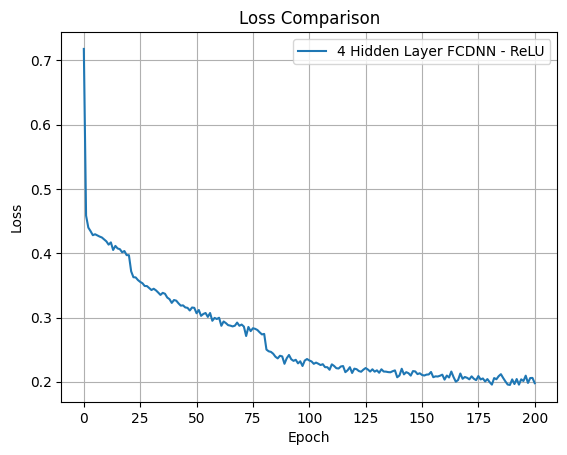

In [359]:
plt.plot(lossF, label= '4 Hidden Layer FCDNN - ReLU' )
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

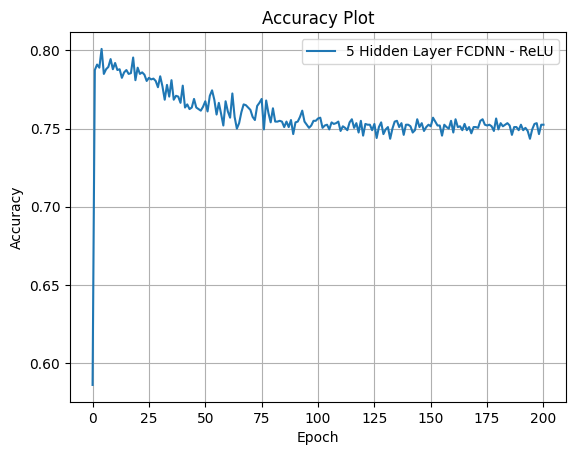

In [360]:
plt.plot(test_accF, label= '5 Hidden Layer FCDNN - ReLU' )
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid(True)
plt.show()

# **5. Convolutional Neural Network**

* ### **5.1)** Data Preparation

In [361]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop(columns=['PlacementStatus']).values
y = df['PlacementStatus'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.FloatTensor(X_train).view(-1, 1, 1, X.shape[1])
X_test_tensor = torch.FloatTensor(X_test).view(-1, 1, 1, X.shape[1])
y_train_tensor = torch.FloatTensor(y_train).view(-1)
y_test_tensor = torch.FloatTensor(y_test).view(-1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

n_features = X.shape[1]

* ### **5.2)** Model Definitions

In [362]:
class CNNWithoutDropout(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(1, 3), padding=(0, 1))
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 3), padding=(0, 1))
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(1, 3), padding=(0, 1))
        self.relu3 = nn.ReLU()
        self.fc_input_size = 64 * 1 * n_features
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = self.relu4(self.fc1(x))
        x = self.relu5(self.fc2(x))
        x = self.fc3(x)  # Sin sigmoid
        return x

class CNNWithDropout(nn.Module):
    def __init__(self, n_features, dropout_rate=0.3):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(1, 3), padding=(0, 1))
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(1, 3), padding=(0, 1))
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(1, 3), padding=(0, 1))
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc_input_size = 64 * 1 * n_features
        self.fc1 = nn.Linear(self.fc_input_size, 128)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.conv1(x)))
        x = self.dropout2(self.relu2(self.conv2(x)))
        x = self.dropout3(self.relu3(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout4(self.relu4(self.fc1(x)))
        x = self.dropout5(self.relu5(self.fc2(x)))
        x = self.fc3(x)  # Sin sigmoid
        return x

* ### **5.3)** Training Functions

In [363]:
def train_model(model, train_loader, test_loader, epochs=50, lr=0.001):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss, correct_train, total_train = 0.0, 0, 0
        for inputs, labels in train_loader:
            outputs = model(inputs).view(-1)
            labels = labels.view(-1)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            preds = (torch.sigmoid(outputs) > 0.5).float()
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)

        # Validación
        model.eval()
        test_loss, correct_test, total_test = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs).view(-1)
                labels = labels.view(-1)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                preds = (torch.sigmoid(outputs) > 0.5).float()
                correct_test += (preds == labels).sum().item()
                total_test += labels.size(0)

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(100 * correct_test / total_test)

        if (epoch + 1) % 10 == 0:
            print(f'Época {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.2f}%')

    return train_losses, test_losses, train_accuracies, test_accuracies

* ### **5.4)** Training Execution

In [364]:
model_without_dropout = CNNWithoutDropout(n_features)
model_with_dropout = CNNWithDropout(n_features)

print("Entrenando modelo sin dropout:")
train_losses_no_dropout, test_losses_no_dropout, train_acc_no_dropout, test_acc_no_dropout = train_model(model_without_dropout, train_loader, test_loader)

print("\nEntrenando modelo con dropout:")
train_losses_dropout, test_losses_dropout, train_acc_dropout, test_acc_dropout = train_model(model_with_dropout, train_loader, test_loader)

Entrenando modelo sin dropout:
Época 10/50, Train Loss: 0.4527, Train Acc: 79.12%, Test Loss: 0.4350, Test Acc: 79.15%
Época 20/50, Train Loss: 0.4479, Train Acc: 79.30%, Test Loss: 0.4464, Test Acc: 79.15%
Época 30/50, Train Loss: 0.4457, Train Acc: 79.81%, Test Loss: 0.4786, Test Acc: 77.40%
Época 40/50, Train Loss: 0.4442, Train Acc: 79.34%, Test Loss: 0.4289, Test Acc: 79.50%
Época 50/50, Train Loss: 0.4326, Train Acc: 80.28%, Test Loss: 0.4429, Test Acc: 79.30%

Entrenando modelo con dropout:
Época 10/50, Train Loss: 0.5228, Train Acc: 75.44%, Test Loss: 0.5439, Test Acc: 71.25%
Época 20/50, Train Loss: 0.4928, Train Acc: 77.01%, Test Loss: 0.5476, Test Acc: 71.60%
Época 30/50, Train Loss: 0.4856, Train Acc: 77.67%, Test Loss: 0.5438, Test Acc: 72.45%
Época 40/50, Train Loss: 0.4803, Train Acc: 77.78%, Test Loss: 0.5826, Test Acc: 68.55%
Época 50/50, Train Loss: 0.4763, Train Acc: 78.28%, Test Loss: 0.7124, Test Acc: 58.60%


* ### **5.5)** Results Visualization

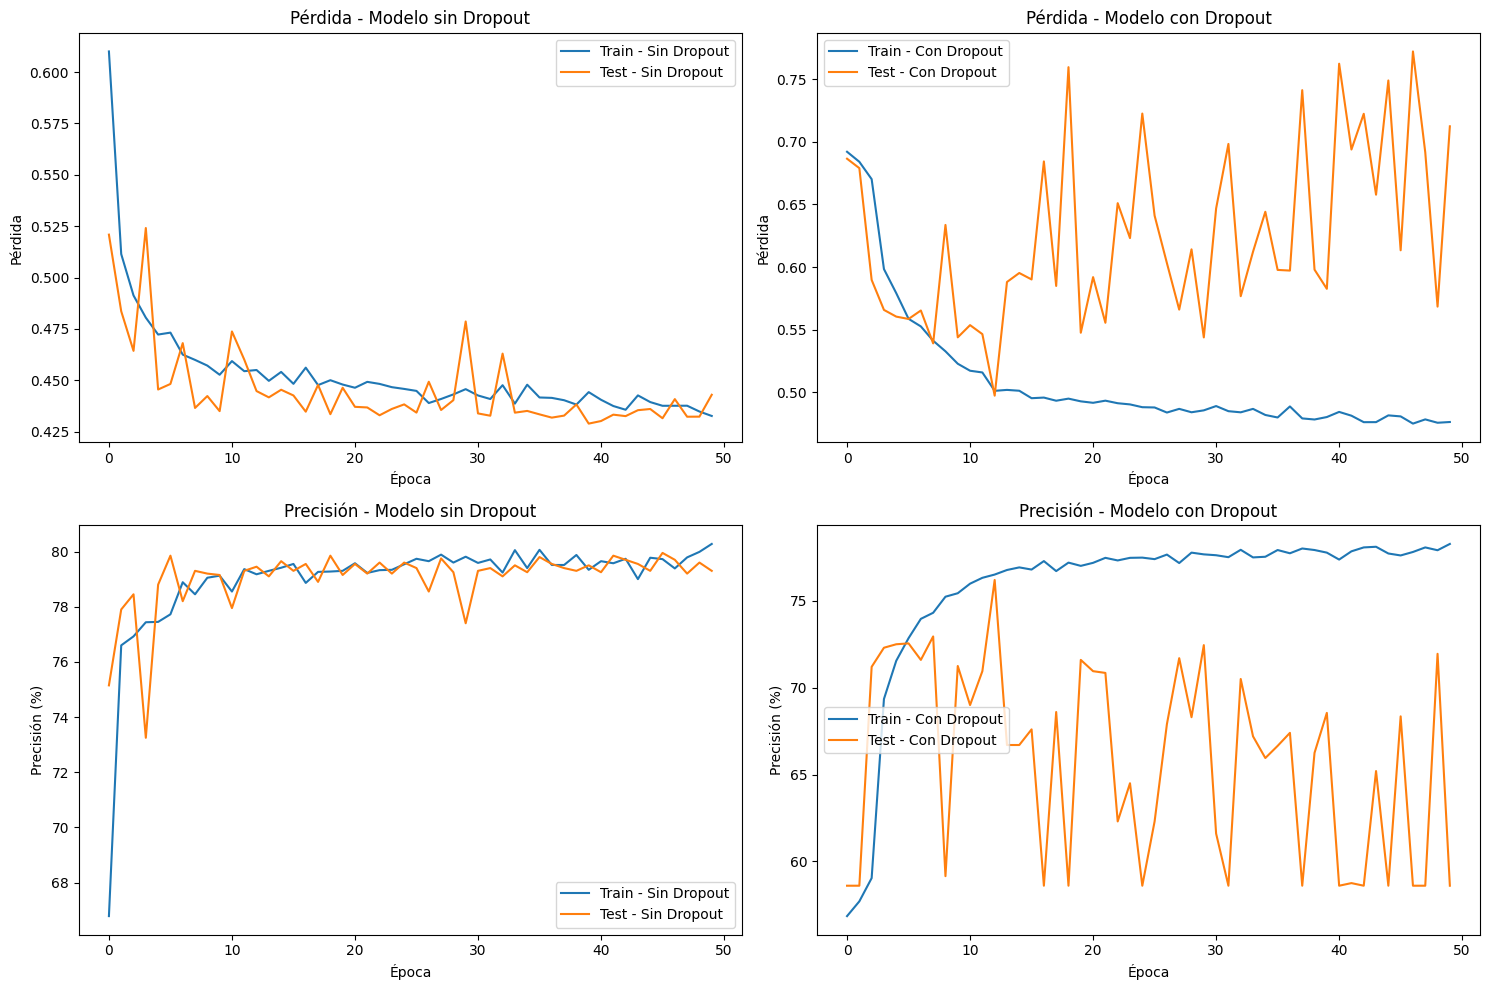

In [365]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(train_losses_no_dropout, label='Train - Sin Dropout')
plt.plot(test_losses_no_dropout, label='Test - Sin Dropout')
plt.title('Pérdida - Modelo sin Dropout')
plt.xlabel('Época'); plt.ylabel('Pérdida'); plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_losses_dropout, label='Train - Con Dropout')
plt.plot(test_losses_dropout, label='Test - Con Dropout')
plt.title('Pérdida - Modelo con Dropout')
plt.xlabel('Época'); plt.ylabel('Pérdida'); plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_acc_no_dropout, label='Train - Sin Dropout')
plt.plot(test_acc_no_dropout, label='Test - Sin Dropout')
plt.title('Precisión - Modelo sin Dropout')
plt.xlabel('Época'); plt.ylabel('Precisión (%)'); plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_acc_dropout, label='Train - Con Dropout')
plt.plot(test_acc_dropout, label='Test - Con Dropout')
plt.title('Precisión - Modelo con Dropout')
plt.xlabel('Época'); plt.ylabel('Precisión (%)'); plt.legend()

plt.tight_layout()
plt.show()

* ### **5.6)** Final Evaluation

In [366]:
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).view(-1)
            preds = (torch.sigmoid(outputs) > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

acc_no_dropout = evaluate_model(model_without_dropout, test_loader)
acc_dropout = evaluate_model(model_with_dropout, test_loader)

print("\n:")
print(f"Accuracy w/o Dropout: {acc_no_dropout:.2f}%")
print(f"Accuracy w/ Dropout: {acc_dropout:.2f}%")
print(f"Difference: {acc_dropout - acc_no_dropout:.2f}%")


:
Accuracy w/o Dropout: 79.30%
Accuracy w/ Dropout: 58.60%
Difference: -20.70%


In [367]:
%%capture
model_f = FCDNN(
    dim_in=input_dim,
    dim_out=1,
    neurons_hidden=[256,128, 64, 32],
    hidden_activations=[nn.ReLU(), nn.ReLU(), nn.ReLU(), nn.ReLU()],
    dropout_hidden=[0.0, 0.0, 0.0, 0.0],
    batch_norm=False,
    add_residual=False,
    link_function=nn.Sigmoid(),
    loss_function=nn.BCELoss()
)
model_f.to('cpu')